In [1]:
import pandas as pd
import pandas as pd
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

In [2]:
dataset = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Read the dataset into a Pandas DataFrame
TITANIC = pd.read_csv(dataset)

In [3]:
import sys
sys.path.append('..')
from xDL.models.NATTLSS import NATTLSS

In [4]:
model = NATTLSS(
    "survived ~  -1 + MLP(fare) + MLP(age) + Transformer(sex):Transformer(deck):Transformer(embark_town)", 
    data=TITANIC, 
    feature_dropout=0.0001, 
    family="Logistic")

--- Preprocessing ---


6it [00:00, 10.08it/s]
5it [00:00, ?it/s]


------------- Network architecture --------------
chosen distribution: Logistic, distributional parameters: ['loc', 'scale']
Transformer -> (ListWrapper(['sex', 'deck', 'embark_town']), dims=32, depth=4, heads=8) -> MLP(input_dim=96) -> output dimension=2
fare -> MLP(feature=fare, n_params=12800) -> output dimension=2
age -> MLP(feature=age, n_params=12800) -> output dimension=2


In [5]:
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer = optimizer,
    loss = {"output": model.NegativeLogLikelihood, "importances": None, "att_weights": None},
    metrics= {"output": [tf.keras.metrics.AUC(name="PR AUC", curve='PR'), tf.keras.metrics.AUC(name="auc")], "importances": None, "att_weights": None},)

history = model.fit(
    model.training_dataset, 
    epochs=30, 
    validation_data=model.validation_dataset,
    verbose=1
)

Epoch 1/30
1/1 [==============================] - 9s 9s/step - loss: 1.1657 - output_loss: 1.1657 - output_PR AUC: 0.3803 - output_auc: 0.5158 - val_loss: 1.1018 - val_output_loss: 1.1018 - val_output_PR AUC: 0.4208 - val_output_auc: 0.5553
Epoch 2/30
1/1 [==============================] - 0s 162ms/step - loss: 1.1226 - output_loss: 1.1226 - output_PR AUC: 0.4075 - output_auc: 0.5028 - val_loss: 1.0780 - val_output_loss: 1.0780 - val_output_PR AUC: 0.3708 - val_output_auc: 0.4951
Epoch 3/30
1/1 [==============================] - 0s 203ms/step - loss: 1.0895 - output_loss: 1.0895 - output_PR AUC: 0.3945 - output_auc: 0.5015 - val_loss: 1.0489 - val_output_loss: 1.0489 - val_output_PR AUC: 0.2712 - val_output_auc: 0.4141
Epoch 4/30
1/1 [==============================] - 0s 175ms/step - loss: 1.0607 - output_loss: 1.0607 - output_PR AUC: 0.3567 - output_auc: 0.4645 - val_loss: 1.0282 - val_output_loss: 1.0282 - val_output_PR AUC: 0.4123 - val_output_auc: 0.5127
Epoch 5/30
1/1 [===========

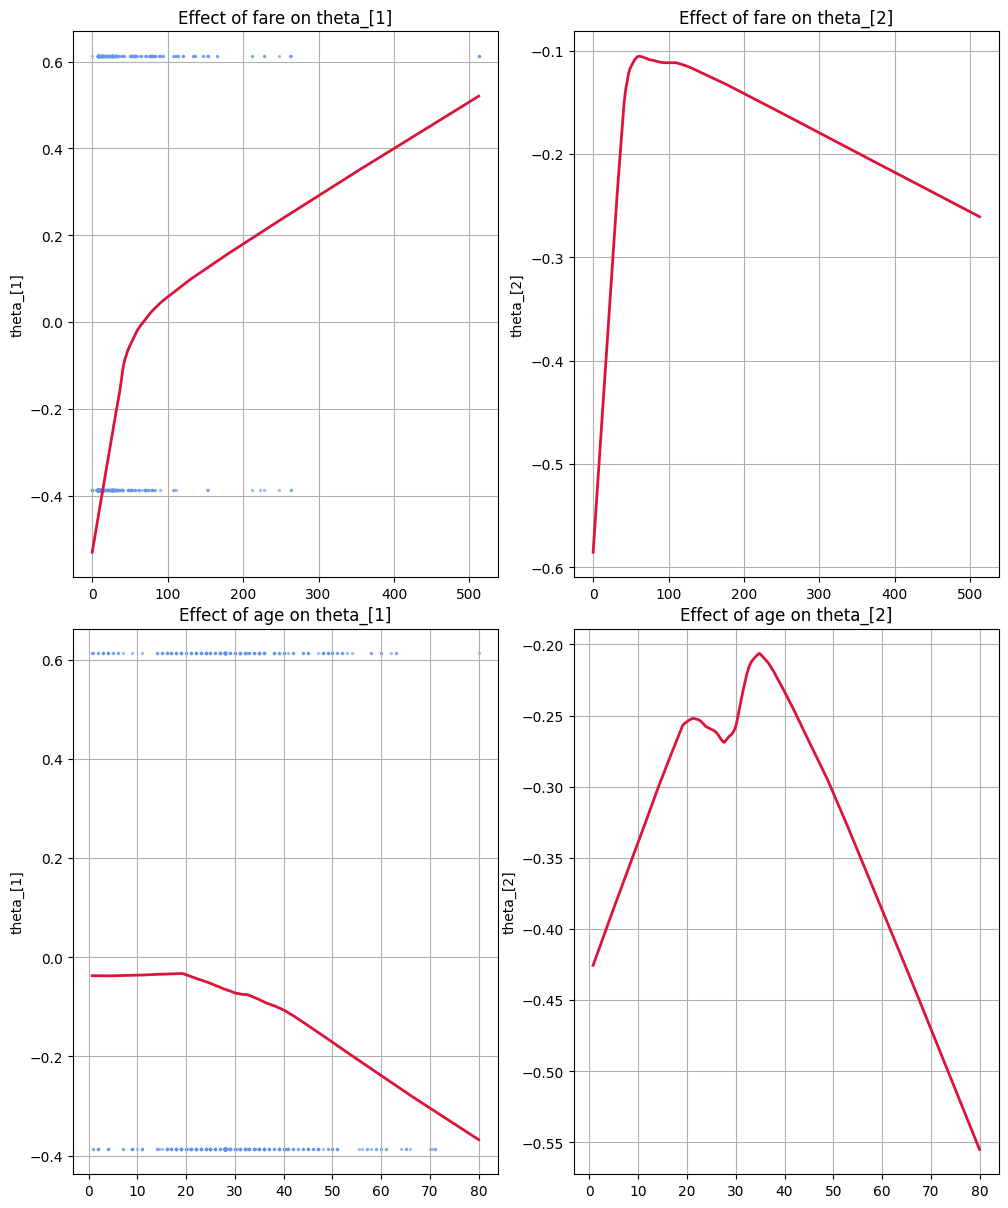

In [6]:
model.plot()

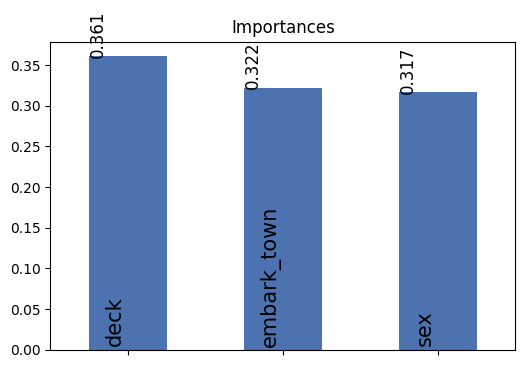

In [7]:
model.plot_importances()

--- Preprocessing ---


0it [00:00, ?it/s]

6it [00:00,  9.77it/s]


<Figure size 1200x400 with 0 Axes>

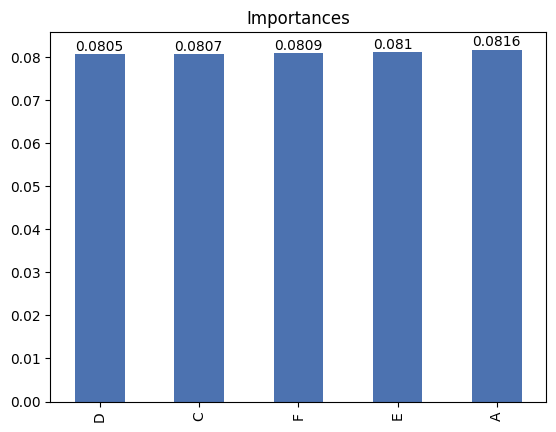

In [8]:
model.plot_categorical_importances()

--- Preprocessing ---


0it [00:00, ?it/s]

6it [00:00, 10.49it/s]


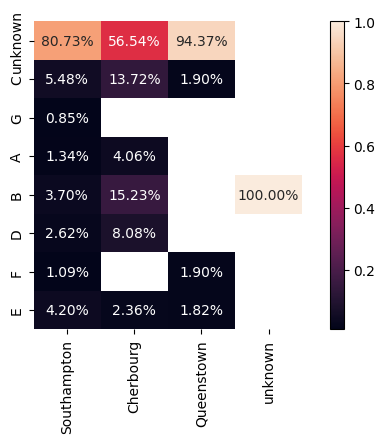

In [9]:
model.plot_heatmap_importances("embark_town", "deck")